# データ解析特論第４回

線形モデルの回帰分析や分散分析を行う場合，statsmodels パッケージが便利．

## 線形単回帰

In [1]:
!pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
# データ(中村「多次元データ解析法」共立 より)
x = np.array([0.91, 0.83, 0.8, 0.83, 0.86, 0.85, 0.84, 0.81, 0.79, 0.89, 0.85, 0.83])
y = np.array([7.2, 4.1, 2.9, 3.8, 5.7, 5.1, 4.4, 3.6, 3.1, 6.4, 4.7, 4.2])
df = pd.DataFrame({'y': y, 'x': x})  # データフレームを作成

In [3]:
df

,y,x
0,7.2,0.91
1,4.1,0.83
2,2.9,0.80
3,3.8,0.83
4,5.7,0.86
5,5.1,0.85
6,4.4,0.84
7,3.6,0.81
8,3.1,0.79
9,6.4,0.89


In [4]:
results = smf.ols("y ~ x", data=df).fit()
#目的変数 ~ 説明変数
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     284.0
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           1.14e-08
Time:                        21:52:18   Log-Likelihood:                0.59704
No. Observations:                  12   AIC:                             2.806
Df Residuals:                      10   BIC:                             3.776
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.3975      1.841    -14.340      0.0

/Users/matsumoto-hirotomo/.pyenv/versions/3.11.4/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


求めた戦型回帰の可視化
paramsが係数

/var/folders/r2/q8_hcldj4f33gjgpcmt2s_yw0000gn/T/ipykernel_86869/775816406.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_array = results.params[0] + results.params[1] * x_array


Text(0.5, 0, 'x')

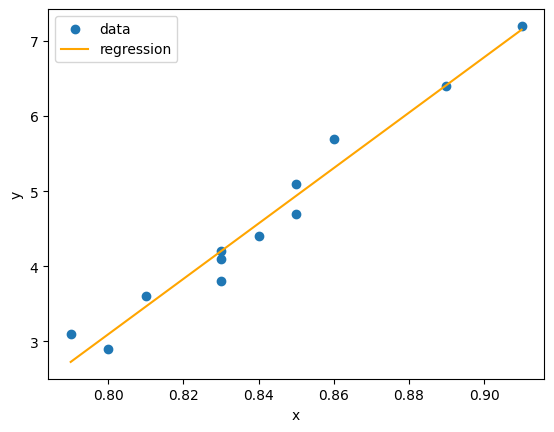

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(x, y, label="data")
x_array = np.linspace(np.min(x), np.max(x), num=100)
y_array = results.params[0] + results.params[1] * x_array
plt.plot(x_array, y_array, color='orange', label="regression")
plt.legend()
plt.ylabel('y')
plt.xlabel('x')

## ３次式回帰
一次回帰と同じ．説明変数として，$x^2$や$x^3$を追加してやればよい．

In [6]:
df = pd.DataFrame({'y': y, 'x': x, 'xx': x**2, 'xxx': x**3})
results = smf.ols('y ~ x + xx + xxx', data=df).fit()
print(results.summary())

/Users/matsumoto-hirotomo/.pyenv/versions/3.11.4/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     109.5
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           7.78e-07
Time:                        21:52:19   Log-Likelihood:                 2.7465
No. Observations:                  12   AIC:                             2.507
Df Residuals:                       8   BIC:                             4.447
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1837.8528   1163.368      1.580      0.1

/var/folders/r2/q8_hcldj4f33gjgpcmt2s_yw0000gn/T/ipykernel_86869/3792703096.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_array = results.params[0] + results.params[1] * x_array + results.params[2] * x_array**2 + results.params[3] * x_array**3


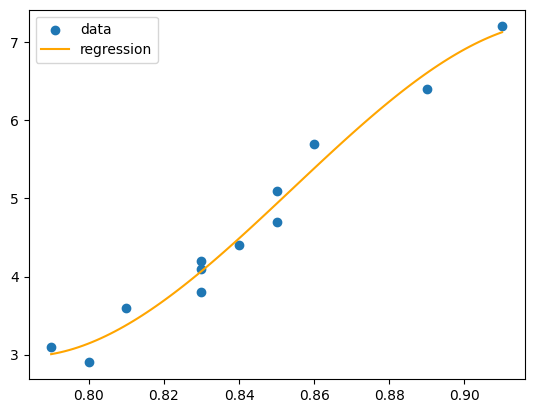

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(x, y, label="data")
x_array = np.linspace(np.min(x), np.max(x), num=100)
y_array = results.params[0] + results.params[1] * x_array + results.params[2] * x_array**2 + results.params[3] * x_array**3
plt.plot(x_array, y_array, color='orange', label="regression")
plt.legend()

## 一元配置の分散分析

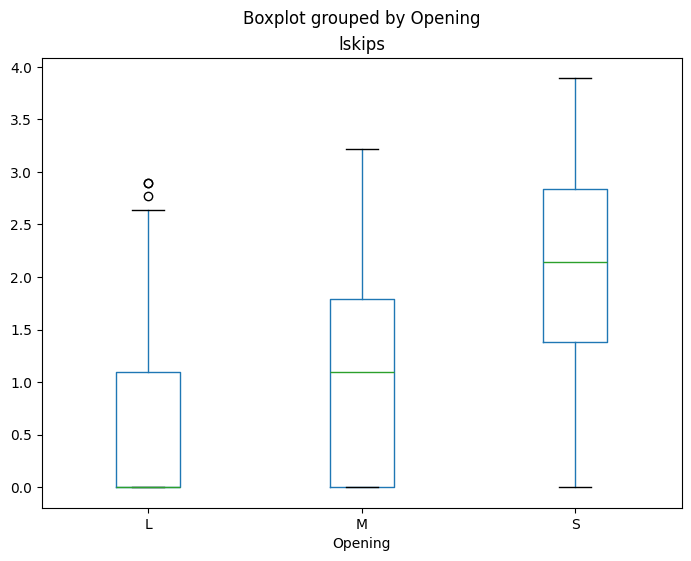

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# データのダウンロード＆読み込み
# データの説明: https://vincentarelbundock.github.io/Rdatasets/doc/survival/solder.html
data = sm.datasets.get_rdataset("solder", "survival", cache=True).data
data['lskips'] = np.log(1 + data['skips'])
# ボックスプロット
fig, ax = plt.subplots(figsize=(8, 6))
fig = data.boxplot("lskips", "Opening", ax=ax, grid=False)

In [9]:
data

,Opening,Solder,Mask,PadType,Panel,skips,lskips
0,L,Thick,A1.5,W4,1,0,0.000000
1,L,Thick,A1.5,W4,2,0,0.000000
2,L,Thick,A1.5,W4,3,0,0.000000
3,L,Thick,A1.5,D4,1,0,0.000000
4,L,Thick,A1.5,D4,2,0,0.000000
...,...,...,...,...,...,...,...
895,S,Thin,B6,W9,2,21,3.091042
896,S,Thin,B6,W9,3,15,2.772589
897,S,Thin,B6,L9,1,11,2.484907
898,S,Thin,B6,L9,2,33,3.526361


In [ ]:
import statsmodels.formula.api as smf
data_lm = smf.ols('np.log(1+skips) ~ C(Opening)', data = data).fit()
#olsには関数も渡せる。Cはカテゴリー変数をone-hotに

In [11]:
print(data_lm.model.data.orig_exog)

     Intercept  C(Opening)[T.M]  C(Opening)[T.S]
0          1.0              0.0              0.0
1          1.0              0.0              0.0
2          1.0              0.0              0.0
3          1.0              0.0              0.0
4          1.0              0.0              0.0
..         ...              ...              ...
895        1.0              0.0              1.0
896        1.0              0.0              1.0
897        1.0              0.0              1.0
898        1.0              0.0              1.0
899        1.0              0.0              1.0

[900 rows x 3 columns]


In [12]:
print(data_lm.summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(1 + skips)   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     201.1
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           7.00e-73
Time:                        21:52:19   Log-Likelihood:                -1203.2
No. Observations:                 900   AIC:                             2412.
Df Residuals:                     897   BIC:                             2427.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5730      0.053     

In [ ]:
sm.stats.anova_lm(data_lm)
#線形回帰の結果をanova_lmに渡すと分散分析を行う
#今回は尤度水準95で棄却できる

,df,sum_sq,mean_sq,F,PR(>F)
C(Opening),2.0,342.465429,171.232715,201.095919,6.997500e-73
Residual,897.0,763.793444,0.851498,NaN,NaN


## 二元配置の分散分析

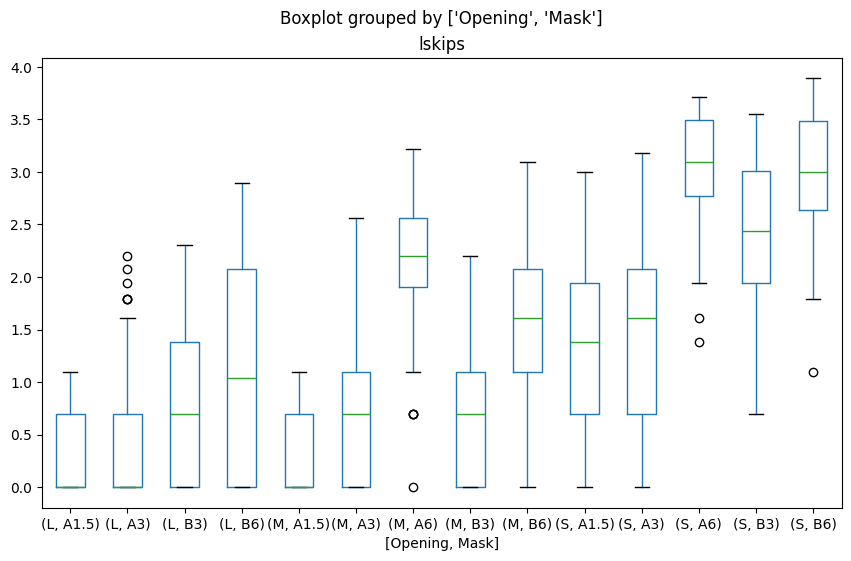

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
# データのダウンロード＆読み込み
data = sm.datasets.get_rdataset("solder", "survival", cache=True).data
data['lskips'] = np.log(1 + data['skips'])
# ボックスプロット
fig, ax = plt.subplots(figsize=(10, 6))
fig = data.boxplot("lskips", ["Opening", "Mask"], ax=ax, grid=False)

In [15]:
data

,Opening,Solder,Mask,PadType,Panel,skips,lskips
0,L,Thick,A1.5,W4,1,0,0.000000
1,L,Thick,A1.5,W4,2,0,0.000000
2,L,Thick,A1.5,W4,3,0,0.000000
3,L,Thick,A1.5,D4,1,0,0.000000
4,L,Thick,A1.5,D4,2,0,0.000000
...,...,...,...,...,...,...,...
895,S,Thin,B6,W9,2,21,3.091042
896,S,Thin,B6,W9,3,15,2.772589
897,S,Thin,B6,L9,1,11,2.484907
898,S,Thin,B6,L9,2,33,3.526361


In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_lm = smf.ols("np.log(1+skips) ~ C(Opening) * C(Mask)", data=data).fit()
sm.stats.anova_lm(data_lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(Opening),2.0,342.465429,171.232715,338.547830,5.991520e-110
C(Mask),4.0,285.632373,71.408093,141.182455,2.341378e-93
C(Opening):C(Mask),8.0,30.156566,3.769571,7.452898,1.203127e-09
Residual,886.0,448.126296,0.505786,NaN,NaN
